In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

from sklearn.preprocessing import MultiLabelBinarizer

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm, trange
import math

from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

import gc

from collections import Counter
import collections

import matplotlib.pyplot as plt

import seaborn as sns
import statistics

Mounted at /content/gdrive


### 1. Prepare and Clean Data
---


#### 1.1 Rs_nlp_corpus1.csv


#### Xử lý dữ liệu thô

In [2]:
#load file ở đây:
rs_nlp = pd.read_csv('/content/gdrive/MyDrive/Đại học/Data/rs_cf/rs_nlp_corpus1.csv', sep='delimiter', header=None)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


Dữ liệu bao gồm 65508 dòng và 7 cột **(bao gồm: content_id,content_name,content_desc,content_cate_id,content_director,content_actor,content_country)**, trong đó có những cột có nhiều giá trị, giữa nhưng giá trị này được phân cách bởi dấu phẩy. Dấu hiệu nhận biết các giá trị ở trong một cột: nếu một phần tử của cột có nhiều giá trị,  đó phần tử đó được gói trong 2 kí tự '\x00' ở đầu và cuối cột.


In [3]:
rs_nlp['nor'] = [x.replace(', ' ,';') for x in rs_nlp[0]]
rs_nlp['nor'] = [x.replace('\x00' ,'') for x in rs_nlp.nor]
rs_nlp['nor'] = [x.replace('\xa0' ,'') for x in rs_nlp.nor]

rs_nlp['array'] = [np.array(x.split(','), dtype=object) for x in rs_nlp.nor]

rs_nlp

,0,nor,array
0,"content_id,content_name,content_desc,content_c...","content_id,content_name,content_desc,content_c...","[content_id, content_name, content_desc, conte..."
1,"128185,Thiên nhiên hoang dã Brazil - Phần 1 - ...","128185,Thiên nhiên hoang dã Brazil - Phần 1 - ...","[128185, Thiên nhiên hoang dã Brazil - Phần 1 ..."
2,"128187,Thiên nhiên hoang dã Brazil - Phần 1 - ...","128187,Thiên nhiên hoang dã Brazil - Phần 1 - ...","[128187, Thiên nhiên hoang dã Brazil - Phần 1 ..."
3,"128189,Thiên nhiên hoang dã Brazil - Phần 1 - ...","128189,Thiên nhiên hoang dã Brazil - Phần 1 - ...","[128189, Thiên nhiên hoang dã Brazil - Phần 1 ..."
4,"128191,Thiên nhiên hoang dã Brazil - Phần 1 - ...","128191,Thiên nhiên hoang dã Brazil - Phần 1 - ...","[128191, Thiên nhiên hoang dã Brazil - Phần 1 ..."
...,...,...,...
65503,"13531,Đội Quân Siêu Trộm, <p>Quy tụ một dàn di...","13531,Đội Quân Siêu Trộm,<p>Quy tụ một dàn diễ...","[13531, Đội Quân Siêu Trộm, <p>Quy tụ một dàn ..."
65504,"12155,Quý Tử Bất Đắc Dĩ, <p>Cặp cha con Hoài L...","12155,Quý Tử Bất Đắc Dĩ,<p>Cặp cha con Hoài Li...","[12155, Quý Tử Bất Đắc Dĩ, <p>Cặp cha con Hoài..."
65505,"11635,Sóc Siêu Quậy 4: Sóc Chuột Du Hí, <p>Đượ...","11635,Sóc Siêu Quậy 4: Sóc Chuột Du Hí,<p>Được...","[11635, Sóc Siêu Quậy 4: Sóc Chuột Du Hí, <p>Đ..."
65506,"9469,Vua Bọ Cạp, <p>Người hùng Mathayus được p...","9469,Vua Bọ Cạp,<p>Người hùng Mathayus được ph...","[9469, Vua Bọ Cạp, <p>Người hùng Mathayus được..."


In [4]:
#Tìm các dòng gặp vấn đề với cách xử lý trên
unnor_rows = []
for x in range(len(rs_nlp)):
  if len(rs_nlp.array[x]) != 7 :
    unnor_rows.append(x)

print('Number of Rows was not accepted the normalization: ', len(unnor_rows))
print('They are:', unnor_rows)

#Thống kê
dict_num = {}
for x in unnor_rows:
  if len(rs_nlp.array[x]) in dict_num.keys():
    dict_num[len(rs_nlp.array[x])] += 1
  else:
    dict_num[len(rs_nlp.array[x])] = 1

print('Statistical:',dict_num)

Number of Rows was not accepted the normalization:  9718
They are: [27, 31, 57, 58, 62, 69, 70, 71, 73, 74, 75, 76, 77, 79, 81, 82, 86, 88, 99, 100, 101, 123, 133, 139, 143, 144, 159, 163, 179, 185, 202, 204, 210, 213, 214, 233, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 274, 275, 283, 313, 314, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 380, 421, 422, 423, 424, 425, 426, 427, 428, 429, 441, 452, 458, 459, 460, 461, 462, 463, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 517, 518, 529, 530, 531, 532, 533, 548, 562, 603, 604, 605, 606, 607, 608, 609, 610, 612, 613, 636, 638, 640, 641, 662, 663, 664, 667, 668, 669, 670, 671, 674, 694, 697, 704, 707, 719, 720, 722, 724, 728, 733, 735, 740, 745, 747, 750, 763, 764, 766, 768, 787, 788, 789, 791, 793, 796, 798, 800, 802, 805, 807, 827, 829, 830, 831, 836, 909, 916, 918, 950, 965, 994, 997, 1045, 1048, 1052, 1055, 1122, 1145, 1146, 1222, 1227, 1232, 1235, 1236, 1244, 1262, 1274, 1289, 1312, 1315, 1329, 1337, 1

In [5]:
#Xử lý các bản ghi gặp vấn đề với cách xử lý trên:
def normalize_num_col(rs_nlp, x):
  i = 0
  row_line = rs_nlp[0][x]
  row_array = []

  while(i < len(row_line)):
    #xử lý array trong chuỗi
    if row_line[i] == '\x00':
      for j in range(i+1, len(row_line)):
        if row_line[j] == '\x00':
          row_array.append(row_line[i:j])
          #check xem kí tự kết thúc đã ở cuối chưa
          if j+1 == len(row_line) -1:
            i = j
          else:
            i = j+1
          break
    else:
      for j in range(i, len(row_line)):
        #check xem kí tự bắt đầu đã ở cuối chưa
        if j == len(row_line)-1:

          if row_line[j] == ',':
            #check liệu phía trước có kí tự '/x00' không
            if row_line[j-1] != '\x00':
              row_array.append(row_line[i:len(row_line)-1])

            row_array.append('none')
          else:
            row_array.append(row_line[i:len(row_line)])

          i = j
        else:
          if row_line[j] == ',':
            row_array.append(row_line[i:j])
            i = j
            break
    i+=1
  #loại bỏ '\x00'
  for x in range(len(row_array)):
    row_array[x] = row_array[x].replace('\x00', '')
    row_array[x] = row_array[x].replace('\xa0', '')
    row_array[x] = row_array[x].replace(', ', ';')
  
 
  return np.array(row_array)

#Gọi nor func cho từng bản ghi:
for x in unnor_rows:
  rs_nlp.array[x] = normalize_num_col(rs_nlp, x)


In [6]:
#tạo dataframe item
df_rs = pd.DataFrame(rs_nlp[0][1:])
df_rs[rs_nlp.array[0]] = 0
for i in tqdm(range(1,len(rs_nlp))):
  for x in range(len(rs_nlp.array[0])):
    df_rs[rs_nlp.array[0][x]][i] = rs_nlp.array[i][x]

df_rs

  0%|          | 0/65507 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,0,content_id,content_name,content_desc,content_cate_id,content_director,content_actor,content_country
1,"128185,Thiên nhiên hoang dã Brazil - Phần 1 - ...",128185,Thiên nhiên hoang dã Brazil - Phần 1 - Tập 9 4K,<p>Sâu trong trái tim của Brazil là Pantanal;m...,,Love 4K Nature,Animals,America
2,"128187,Thiên nhiên hoang dã Brazil - Phần 1 - ...",128187,Thiên nhiên hoang dã Brazil - Phần 1 - Tập 10 4K,<p>Sâu trong trái tim của Brazil là Pantanal;m...,,Love 4K Nature,Animals,America
3,"128189,Thiên nhiên hoang dã Brazil - Phần 1 - ...",128189,Thiên nhiên hoang dã Brazil - Phần 1 - Tập 7 4K,<p>Sâu trong trái tim của Brazil là Pantanal;m...,,Love 4K Nature,Animals,America
4,"128191,Thiên nhiên hoang dã Brazil - Phần 1 - ...",128191,Thiên nhiên hoang dã Brazil - Phần 1 - Tập 8 4K,<p>Sâu trong trái tim của Brazil là Pantanal;m...,,Love 4K Nature,Animals,America
5,"128179,Ngày Hôm Qua, Với nội dung hài hước kết...",128179,Ngày Hôm Qua,Với nội dung hài hước kết hợp với những bài há...,6932,Danny Boyle,Himesh Patel;Lily James;Sophia Di Martino,America
...,...,...,...,...,...,...,...,...
65503,"13531,Đội Quân Siêu Trộm, <p>Quy tụ một dàn di...",13531,Đội Quân Siêu Trộm,<p>Quy tụ một dàn diễn viên toàn ngôi sao;bộ p...,7255,Choi Dong Hoon,Kim Yoon Seok;Lee Jeong Jae;Kim Hye Soo,15
65504,"12155,Quý Tử Bất Đắc Dĩ, <p>Cặp cha con Hoài L...",12155,Quý Tử Bất Đắc Dĩ,<p>Cặp cha con Hoài Linh;Hoài Lâm cùng với dàn...,7257,NSND Trần Ngọc Giàu,Hoài Linh;Việt Hương;Hoài Lâm;Huy Khánh,1
65505,"11635,Sóc Siêu Quậy 4: Sóc Chuột Du Hí, <p>Đượ...",11635,Sóc Siêu Quậy 4: Sóc Chuột Du Hí,<p>Được đầu tư tới 90 triệu đô;trong phần 4 lo...,6930,Walt Becker,Jason Lee;Jesica Ahlberg;Josh Green,6
65506,"9469,Vua Bọ Cạp, <p>Người hùng Mathayus được p...",9469,Vua Bọ Cạp,<p>Người hùng Mathayus được phái đi ám sát tên...,7273,Chuck Russell,Dwayne Johnson;Steven Brand;Michael Clarke Duncan,6


#### Xử lý trùng lặp

In [7]:
#loại bỏ giá trị lỗi
df_rs_nlp = df_rs.loc[df_rs.content_id.isin(['8797;- Game thủ',
'8801;- Vạch trần tội ác']) == False].reset_index(drop = True)

#đổi cột content_id sang dạng int:
df_rs_nlp['content_id'] = [int(x) for x in df_rs_nlp.content_id]

#Xử lý các dòng có tất cả các trường giống nhau:
df_rs_nlp = df_rs_nlp.drop_duplicates(ignore_index = True)

#Xử lý các dòng có content_id giống nhau:
duplicate_content_id = pd.concat(g for _, g in df_rs_nlp.groupby("content_id") if len(g) > 1).reset_index(drop = True)
i = 0
while i < len(duplicate_content_id):
  #tạo list các category:
  list_cate = duplicate_content_id.content_cate_id[i].split(',')
  if '' in list_cate:
    list_cate.remove('')
  count = 0

  #thêm các category còn thiêu
  for j in range(i+1, len(duplicate_content_id)):
    if duplicate_content_id.content_id[j] ==  duplicate_content_id.content_id[i]: 
      for x in duplicate_content_id.content_cate_id[j].split(','):
        if x not in list_cate and x != '':
          list_cate.append(x)
      count += 1
    else:
      break
    
  duplicate_content_id.content_cate_id[i] = ','.join(list_cate)
  i += count+1

duplicate_content_id = duplicate_content_id.drop_duplicates(subset = ['content_id'],keep = 'first')

#Tạo kết quả cuối cùng
df_rs_nlp = df_rs_nlp.drop_duplicates(subset=['content_id'], keep = False)
df_rs_nlp = pd.concat([df_rs_nlp,duplicate_content_id]).reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [8]:
# Thay the gia trị rỗng bằng none:
df_rs_nlp
for x in df_rs_nlp:
  if x != 0:
    for i in range(len(df_rs_nlp)):
      # print(x, i)
      if df_rs_nlp[x][i] == '':
        df_rs_nlp[x][i] = 'none'
df_rs_nlp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,0,content_id,content_name,content_desc,content_cate_id,content_director,content_actor,content_country
0,"128185,Thiên nhiên hoang dã Brazil - Phần 1 - ...",128185,Thiên nhiên hoang dã Brazil - Phần 1 - Tập 9 4K,<p>Sâu trong trái tim của Brazil là Pantanal;m...,none,Love 4K Nature,Animals,America
1,"128187,Thiên nhiên hoang dã Brazil - Phần 1 - ...",128187,Thiên nhiên hoang dã Brazil - Phần 1 - Tập 10 4K,<p>Sâu trong trái tim của Brazil là Pantanal;m...,none,Love 4K Nature,Animals,America
2,"128189,Thiên nhiên hoang dã Brazil - Phần 1 - ...",128189,Thiên nhiên hoang dã Brazil - Phần 1 - Tập 7 4K,<p>Sâu trong trái tim của Brazil là Pantanal;m...,none,Love 4K Nature,Animals,America
3,"128191,Thiên nhiên hoang dã Brazil - Phần 1 - ...",128191,Thiên nhiên hoang dã Brazil - Phần 1 - Tập 8 4K,<p>Sâu trong trái tim của Brazil là Pantanal;m...,none,Love 4K Nature,Animals,America
4,"128163,Con Gái Ông Trùm, <p>Du Lãng là tên cướ...",128163,Con Gái Ông Trùm,<p>Du Lãng là tên cướp có tiền án tiền sự;trốn...,5931,Nguyễn Hoàng Trung,Hai Nhất;Bích Trâm;Kiều Trinh,Vietnam
...,...,...,...,...,...,...,...,...
12853,"136017,Bộ Đôi Rắc Rối, Bộ Đôi Rắc Rối là bộ ph...",136017,Bộ Đôi Rắc Rối,Bộ Đôi Rắc Rối là bộ phim chuyển thể từ bộ phi...,6905,Cagatay Tosun,Kerem Bursin;Ibrahim Celikkol,Other
12854,"136019,Trở Lại Tuổi 20, Bà lão Thẩm Mộng Quân ...",136019,Trở Lại Tuổi 20,Bà lão Thẩm Mộng Quân năm nay 70 tuổi với bao ...,5930,Cao Lâm Báo;Từ Huệ Khang,Quy Á Lôi;Hồ Băng Khanh;Tần Hán,China Mainland
12855,"136065,30 Phút Cine - Số 23, 30 Phút Cine: là ...",136065,30 Phút Cine - Số 23,30 Phút Cine: là chương trình dành riêng cho c...,7457,Hoài Trung,Hoài Trung;Thanh Thủy,Vietnam
12856,"136067,30 Phút Cine - Số 24, 30 Phút Cine: là ...",136067,30 Phút Cine - Số 24,30 Phút Cine: là chương trình dành riêng cho c...,7457,Hoài Trung,Hoài Trung;Thanh Thủy,Vietnam


#### 1.2 rs_cf_watch_history.csv

In [9]:
rs_cf = pd.read_csv('/content/gdrive/MyDrive/Đại học/Data/rs_cf/rs_cf_watch_history.csv', sep=',', error_bad_lines=False)
rs_cf

b'Skipping line 3654: expected 6 fields, saw 7\nSkipping line 4675: expected 6 fields, saw 7\nSkipping line 5527: expected 6 fields, saw 7\nSkipping line 6099: expected 6 fields, saw 7\nSkipping line 7718: expected 6 fields, saw 7\nSkipping line 8692: expected 6 fields, saw 7\nSkipping line 9152: expected 6 fields, saw 7\nSkipping line 9366: expected 6 fields, saw 7\nSkipping line 11334: expected 6 fields, saw 7\nSkipping line 12337: expected 6 fields, saw 7\nSkipping line 13099: expected 6 fields, saw 7\nSkipping line 13934: expected 6 fields, saw 7\nSkipping line 14107: expected 6 fields, saw 7\nSkipping line 15164: expected 6 fields, saw 7\nSkipping line 15530: expected 6 fields, saw 7\nSkipping line 15759: expected 6 fields, saw 7\nSkipping line 17186: expected 6 fields, saw 7\nSkipping line 18940: expected 6 fields, saw 7\nSkipping line 20086: expected 6 fields, saw 7\nSkipping line 22571: expected 6 fields, saw 7\nSkipping line 22919: expected 6 fields, saw 7\nSkipping line 23558

,member_id,content_id,content_name,duration,date_time,filename_date
0,7977837,135643,Tân Bảng Phong Thần - Phần 2,2770,2021-06-01 00:00:05,20210601
1,3905329,135789,Thiên La Địa Võng,5378,2021-05-31 23:57:51,20210601
2,2969037,136263,Đưa Con Về Nhà,48,2021-05-31 23:57:54,20210601
3,7673685,130123,Mãng Xà,195,2021-06-01 00:10:14,20210601
4,12029103,132759,Con Rối Hào Môn - Tập 3,2574,2021-06-01 00:08:09,20210601
...,...,...,...,...,...,...
5038264,13143187,136424,Nữ Sát Thủ,8288,2021-06-30 05:17:46,20210630
5038265,659253,136484,Mộ Bạch Thủ,2406,2021-06-30 12:52:15,20210630
5038266,6619599,125059,Đông Cung,36,2021-06-30 12:54:33,20210630
5038267,3967103,136260,Đội Đặc Nhiệm CID,1788,2021-06-30 12:52:39,20210630


In [17]:
df_rs_nlp

,0,content_id,content_name,content_desc,content_cate_id,content_director,content_actor,content_country
0,"128185,Thiên nhiên hoang dã Brazil - Phần 1 - ...",128185,Thiên nhiên hoang dã Brazil - Phần 1 - Tập 9 4K,<p>Sâu trong trái tim của Brazil là Pantanal;m...,none,Love 4K Nature,Animals,America
1,"128187,Thiên nhiên hoang dã Brazil - Phần 1 - ...",128187,Thiên nhiên hoang dã Brazil - Phần 1 - Tập 10 4K,<p>Sâu trong trái tim của Brazil là Pantanal;m...,none,Love 4K Nature,Animals,America
2,"128189,Thiên nhiên hoang dã Brazil - Phần 1 - ...",128189,Thiên nhiên hoang dã Brazil - Phần 1 - Tập 7 4K,<p>Sâu trong trái tim của Brazil là Pantanal;m...,none,Love 4K Nature,Animals,America
3,"128191,Thiên nhiên hoang dã Brazil - Phần 1 - ...",128191,Thiên nhiên hoang dã Brazil - Phần 1 - Tập 8 4K,<p>Sâu trong trái tim của Brazil là Pantanal;m...,none,Love 4K Nature,Animals,America
4,"128163,Con Gái Ông Trùm, <p>Du Lãng là tên cướ...",128163,Con Gái Ông Trùm,<p>Du Lãng là tên cướp có tiền án tiền sự;trốn...,5931,Nguyễn Hoàng Trung,Hai Nhất;Bích Trâm;Kiều Trinh,Vietnam
...,...,...,...,...,...,...,...,...
12853,"136017,Bộ Đôi Rắc Rối, Bộ Đôi Rắc Rối là bộ ph...",136017,Bộ Đôi Rắc Rối,Bộ Đôi Rắc Rối là bộ phim chuyển thể từ bộ phi...,6905,Cagatay Tosun,Kerem Bursin;Ibrahim Celikkol,Other
12854,"136019,Trở Lại Tuổi 20, Bà lão Thẩm Mộng Quân ...",136019,Trở Lại Tuổi 20,Bà lão Thẩm Mộng Quân năm nay 70 tuổi với bao ...,5930,Cao Lâm Báo;Từ Huệ Khang,Quy Á Lôi;Hồ Băng Khanh;Tần Hán,China Mainland
12855,"136065,30 Phút Cine - Số 23, 30 Phút Cine: là ...",136065,30 Phút Cine - Số 23,30 Phút Cine: là chương trình dành riêng cho c...,7457,Hoài Trung,Hoài Trung;Thanh Thủy,Vietnam
12856,"136067,30 Phút Cine - Số 24, 30 Phút Cine: là ...",136067,30 Phút Cine - Số 24,30 Phút Cine: là chương trình dành riêng cho c...,7457,Hoài Trung,Hoài Trung;Thanh Thủy,Vietnam


### 2. Một số thống kê



#### Đếm số lượt xem cho từng user

In [ ]:
def user_vỉew_time(rs_cf, user_id):
  
  user_ids = rs_cf.member_id.value_counts().keys().tolist()
  user_vỉew_count = rs_cf.member_id.value_counts().tolist()
  if user_id not in user_ids:
    print('Not found')
  else:
    for i in range(len(user_ids)):
      if user_id == user_ids[i]:
        print('Người dùng:',user_id,'có tổng số lượt xem là:', user_vỉew_count[i])

user_vỉew_time(rs_cf, user_id = 32141)

Người dùng: 32141 có tổng số lượt xem là: 2575


#### Điền giá trị date_time để bắt đầu thống kê

In [ ]:
date_time= 20210630 #Định dạng yyyymmdd

#### Lấy vị trí bắt đầu và kết thúc theo một tuần
Sau thử nghiệm, tôi nhận thấy các dòng trong Dataframe được sắp xếp theo thứ tự tăng dần của thời gian.

In [ ]:
#Lấy index giá trị đầu cuối
def week_range_value(rs_cf, date_time):
  index_date_time = 0
  if date_time <= rs_cf.filename_date.max():
    #tìm index của time truyền vào
    for i in range(len(rs_cf)-1,0,-1):
      if rs_cf.filename_date[i] == date_time:
        index_date_time = i
        break

    #tìm index cuối cùng trong vòng 1 tuần
    if date_time - 7 <= rs_cf.filename_date[0]:
      return 0, index_date_time
    else:
      for i in range(index_date_time):
        if rs_cf.filename_date[i] == date_time - 7:
          return i, index_date_time
  else:
    return 0,0

#date_time là thời gian được xét (định dạng: yyyymmdd)
index_week_ago, index_date_time = week_range_value(rs_cf, date_time)

#index_week_ago: index của dòng đầu tiên xuất hiện trong khoảng thời gian một tuần
#index_week_ago: index của dòng cuối cùng có date_time
print(index_week_ago, index_date_time)

3759941 5038268


#### Đưa ra Top 30 khách hàng có lượt xem nhiều nhất và ít nhất trong tuần.


In [ ]:
member_view_week = rs_cf.member_id[index_week_ago:index_date_time].value_counts().rename_axis('member_id').reset_index(name='counts')

top_most_view_member = member_view_week[:30]
top_least_view_member = member_view_week[-30:]

In [ ]:
print('date_time (yyyymmdd):', date_time)
print('Top 30 User có lượt xem ít nhất trong tuần là:')
top_least_view_member.reset_index(drop = True)

date_time (yyyymmdd): 20210630
Top 30 User có lượt xem ít nhất trong tuần là:


,member_id,counts
0,12622551,1
1,11663085,1
2,14461688,1
3,2923351,1
4,7561985,1
5,3001213,1
6,1185425,1
7,8141153,1
8,14136083,1
9,13958732,1


In [ ]:
print('date_time (yyyymmdd):', date_time)
print('Top 30 User có lượt xem nhiều nhất trong tuần là:')
top_most_view_member

date_time (yyyymmdd): 20210630
Top 30 User có lượt xem nhiều nhất trong tuần là:


,member_id,counts
0,32141,652
1,453050,491
2,4078,426
3,11532753,367
4,11120273,362
5,2243281,360
6,1372529,336
7,491206,333
8,13997015,321
9,428200,318


#### Top 10 phim có lượt xem lớn nhất, ít nhất trong 1 tuần.

In [ ]:
content_view_week = rs_cf.content_id[index_week_ago:index_date_time].value_counts().rename_axis('content_id').reset_index(name='counts')
top_most_view_content = content_view_week[:10]
top_least_view_content = content_view_week[-10:]
# top_most_view_content
# print('Top 10 Content có lượt xem nhiều nhất trong tuần là:', top_most_view_content)
# print('Top 10 Content có lượt xem ít nhất trong tuần là:', top_most_view_content)

In [ ]:
print('date_time (yyyymmdd):', date_time)
print('Top 10 Content có lượt xem nhiều nhất trong tuần là:')
top_most_view_content

date_time (yyyymmdd): 20210630
Top 10 Content có lượt xem nhiều nhất trong tuần là:


,content_id,counts
0,133487,30332
1,136428,28256
2,124987,26668
3,135789,22840
4,135643,22653
5,136408,21688
6,136417,20800
7,135677,20099
8,136484,17979
9,133131,17897


In [ ]:
print('date_time (yyyymmdd):', date_time)
print('Top 10 Content có lượt xem ít nhất trong tuần là:')
top_least_view_content.reset_index(drop= True)

date_time (yyyymmdd): 20210630
Top 10 Content có lượt xem ít nhất trong tuần là:


,content_id,counts
0,132663,1
1,126537,1
2,124005,1
3,6297,1
4,123194,1
5,123671,1
6,136410,1
7,132657,1
8,122162,1
9,15565,1


#### Đếm thời lượng xem cho từng user

In [ ]:
sum_user_watch_history_all = rs_cf.groupby(['member_id'], as_index=False).sum()
print('Bảng tổng hợp thời lượng xem của từng tài khoản.')
sum_user_watch_history_all.loc[:,['member_id', 'duration']]

Bảng tổng hợp thời lượng xem của từng tài khoản.


,member_id,duration
0,3747,5931
1,3748,18158
2,3749,1918
3,3750,3194
4,3752,142306
...,...,...
317359,14640695,314
317360,14640719,432
317361,14641535,3
317362,14641673,87


In [ ]:
#Tính tổng thời lượng xem trong 1 tuần:
sum_user_watch_history = rs_cf.iloc[index_week_ago:index_date_time].groupby(['member_id'], as_index=False).sum()

In [ ]:
#sắp xếp df lại từ thấp tới cao theo duration:
sorted_duration_user = sum_user_watch_history.sort_values(by=['duration']).loc[:,['member_id', 'duration']]

most_duration_user = sorted_duration_user[-30:]
least_duration_user = sorted_duration_user[:30]

In [ ]:
print('date_time (yyyymmdd):', date_time)
print('Top 30 User có thời lượng xem nhiều nhất trong tuần là:')
most_duration_user.sort_values(by='duration',ascending = False).reset_index(drop = True)

date_time (yyyymmdd): 20210630
Top 30 User có thời lượng xem nhiều nhất trong tuần là:


,member_id,duration
0,32141,814142
1,7643465,695685
2,787724,675399
3,6641505,666889
4,11961697,659920
5,3223173,649930
6,12459039,635837
7,2531533,628432
8,12706607,625597
9,11780667,601302


In [ ]:
print('date_time (yyyymmdd):', date_time)
print('Top 30 User có thời lượng xem ít nhất trong tuần là:')
least_duration_user.reset_index(drop = True)

date_time (yyyymmdd): 20210630
Top 30 User có thời lượng xem ít nhất trong tuần là:


,member_id,duration
0,7047075,3
1,5217383,3
2,11297697,3
3,11294959,3
4,2878133,3
5,14308412,3
6,12986515,3
7,12988517,3
8,5247491,3
9,1401453,3


#### Thống kê và đưa ra thể loại phim có nhiều lượt xem nhất

In [ ]:
content_view_week = rs_cf.content_id[index_week_ago:index_date_time].value_counts().rename_axis('content_id').reset_index(name='counts') #chuyển output value count thành dataframe

# lọc cotent được đã được xem:
df_content_viewed_week = df_rs_nlp.loc[df_rs_nlp.content_id.isin(content_view_week.content_id)].sort_values(by='content_id', ignore_index = True) #sort theo content_id

#lọc bỏ các content_id ở content_view_week không có trong df_content_viewed_week:
content_view_week = content_view_week.loc[content_view_week.content_id.isin(df_content_viewed_week.content_id)].sort_values(by='content_id', ignore_index = True)
content_view_week['genre'] = df_content_viewed_week.content_cate_id
#đếm số lần thể loại phim được xem.
count_genre = {}

for i in range(len(content_view_week)):
    genre_array = content_view_week.genre[i].split(',')
    for x in genre_array:
      if x in count_genre: 
        count_genre[x] += content_view_week.counts[i]
      else:
        count_genre[x] = content_view_week.counts[i]

count_genre = pd.DataFrame.from_dict(count_genre, orient = 'index', columns=['duration']).sort_values(['duration'], ascending = False).reset_index()
count_genre = count_genre.rename(columns={'index':'genre_id'})


In [ ]:
print('date_time (yyyymmdd):', date_time)
print('Top 10 Genre có thời lượng xem nhiều nhất trong tuần là:')
count_genre[:10].reset_index(drop = True)

date_time (yyyymmdd): 20210630
Top 10 Genre có thời lượng xem nhiều nhất trong tuần là:


,genre_id,duration
0,5930,567520
1,5989,188750
2,5943,137900
3,7323,88514
4,7307,78630
5,7325,61779
6,7327,59223
7,5931,44278
8,6905,38299
9,7317,28336


### 3. Giải thuật gợi ý dựa trên nội dung

#### 3.1 Các hàm bổ trợ

In [ ]:
def check_duration_content(rs_cf, user_id):

  #Lấy lịch sử xem user:
  user_view_history = rs_cf.loc[rs_cf.member_id == user_id]

  #Cộng gộp thời lượng xem (content_id đã được sắp xếp từ bé đến lớn):
  sum_duration_history = user_view_history.groupby(['content_id'], as_index=False).sum().sort_values(by = ['content_id'])
  sum_duration_history = sum_duration_history.loc[:,['content_id', 'duration']]

  return sum_duration_history

#check số lần xem
def check_view_content(rs_cf, user_id):

  #Lấy lịch sử xem user:
  user_view_history = rs_cf.loc[rs_cf.member_id == user_id]

  #Cộng gộp thời lượng xem (content_id đã được sắp xếp từ bé đến lớn):
  sum_view_history = user_view_history.groupby(['content_id'], as_index=False).size().sort_values(by = ['content_id'])
  sum_view_history = sum_view_history.loc[:,['content_id', 'size']]

  return sum_view_history

def labels_like(median, sum_view_history, sum_duration_history):
  if sum_view_history['size'][i] > 1 and sum_duration_history.duration[i] >= median:
    return 3
  elif sum_view_history['size'][i] == 1 and sum_duration_history.duration[i] >= median:
    return 2
  elif sum_view_history['size'][i] > 1 and sum_duration_history.duration[i] < median:
    return 2
  elif sum_view_history['size'][i] == 1 and sum_duration_history.duration[i] < median:
    return 1

#Tạo hàm tạo model kết quả trả về là w và b
def model_Ridge(X,Y):
  if len(X) == 0:
    return [[0]],0
  else:
    clf = Ridge(alpha=0.01, fit_intercept  = False)
    clf.fit(X, Y) 

    return clf.coef_

#### 3.2 Xây dựng item-profile
Xây dựng item-profile sẽ bao gồm one hot của thể loại, nhà sản xuất và diễn viên. Output của phần này là dataframe: **item_profile**

In [ ]:
#tạo onehot category
unique_labels = df_rs_nlp.content_cate_id.unique()
original_labels = []
for x in unique_labels:
  #nếu là một list:
  if len(x) != 4:
    list_category =  x.split(',')
    for y in list_category:
      if y not in original_labels:
        original_labels.append(y) 
  #nếu là một số:
  else:
    if x not in original_labels:
      original_labels.append(x) 

df_rs_nlp['content_cate_id_split'] = [x.split(',') for x in df_rs_nlp.content_cate_id]
labels = MultiLabelBinarizer(classes=original_labels).fit_transform( df_rs_nlp.content_cate_id_split.values)
df_genre = pd.DataFrame(columns=original_labels, data=labels, index=df_rs_nlp.index)

df_genre

,none,5931,6905,5930,5989,7300,7283,6932,6927,7259,7255,7273,5965,5961,6007,5962,7317,7319,6930,7267,7207,7213,7211,7265,7296,6908,7298,7261,6903,7279,6928,7320,7307,6904,7263,6931,7277,7229,7215,6929,...,7027,7182,6919,6882,6945,6946,6913,6920,6912,5929,7436,7441,7439,7443,7440,7430,7435,7321,7433,7437,7442,7444,7445,7446,7450,6909,7461,7459,7457,7431,6917,7323,7325,7327,6906,7463,7209,7233,7451,7432
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12853,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12854,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12855,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
12856,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#tạo onehot actor
unique_actor = df_rs_nlp.content_actor.unique()
original_actor = []
for x in  unique_actor:
  #nếu là một list:
    list_actor = x.split(';')
    for y in list_actor:
      if y not in original_actor:
        original_actor.append(y)

df_rs_nlp['content_actor_split'] = [x.split(';') for x in df_rs_nlp.content_actor]
actor_labels = MultiLabelBinarizer(classes=original_actor).fit_transform( df_rs_nlp.content_actor_split.values)
df_actor = pd.DataFrame(columns=original_actor, data=actor_labels, index=df_rs_nlp.index)

df_actor


,Animals,Hai Nhất,Bích Trâm,Kiều Trinh,Hữu Thạch,Ngân Quỳnh,Văn Phượng,Lý Minh Thuận,Phạm Văn Phương,Viên Vịnh Nghi,Hồ Hạnh Nhi,Nguyễn Steven,Hoàng Tâm,Dave Bautista,Kumail Nanjiani,Mira Sorvino,Ruben Dishdishyan,Igor Ugolnikov,Luke Pasqualino,Tom Burke,Santiago Cabrera,Tiêu Chính Nam,Lâm Hạ Vy,Lưu Bội Nguyệt,Atsadaporn Siriwattanakul,"Anusorn Maneeted,",Akira Kamiya,Minami Takayama,Wakana Yamazaki,Benoît Magimel,Jérémie Renier,Eric Savin,Rhona Mitra,Bob Hoskins,Alexander Siddig,Nhiếp Viễn,Châu Nhân,Chung Hân Đồng,Phương Trung Tín,Adelaide Clemens,...,Terence Stamp,Charlie Ray,Cynthia Nixon,Ben Affleck,Jon Favreau,Scott Terra,Ellen Pompeo,Diane Lane,Richard Gere,Oliver Martinez,Erik Per Sullivan,Claire Foye,Joshua Leonard,Jay Pharoah,Matthew Gray Gubler,Marc Anthony,Colin Quinn,Allison Tolman,Conchata Ferrell,Emjay Anthony,J. K. Simmons,Frankie Faison,Giancarlo Giannini,Ben Feldman,Edwin Hodge,François Civil,Marion Lambert,Jeremy Marinas,Steven Dasz,Karen Mok Man-Wai,Shelley Hennig,Moses Jacob Storm,Renee Olstead,Will Peltz,Jacob Wysocki,Courtney Halverson,Jung Sang-Hoon,Tăng Thuấn Hi,Ibrahim Celikkol,Tần Hán
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12853,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
12854,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
12855,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12856,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
item_profile = pd.concat([df_rs_nlp.content_id, df_genre], axis = 1)
item_profile

,content_id,none,5931,6905,5930,5989,7300,7283,6932,6927,7259,7255,7273,5965,5961,6007,5962,7317,7319,6930,7267,7207,7213,7211,7265,7296,6908,7298,7261,6903,7279,6928,7320,7307,6904,7263,6931,7277,7229,7215,...,7027,7182,6919,6882,6945,6946,6913,6920,6912,5929,7436,7441,7439,7443,7440,7430,7435,7321,7433,7437,7442,7444,7445,7446,7450,6909,7461,7459,7457,7431,6917,7323,7325,7327,6906,7463,7209,7233,7451,7432
0,128185,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,128187,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,128189,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,128191,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,128163,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12853,136017,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12854,136019,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12855,136065,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
12856,136067,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


#### 3.3 Xây dựng mô hình và thực nghiệm

In [ ]:
#Tạo hàm tạo model kết quả trả về là w và b
def model_ridge(X,Y):
  if len(X) == 0:
    return False
  else:
    clf = Ridge(alpha=0.01, fit_intercept  = True)
    clf.fit(X, Y) 

    return clf

In [ ]:
#Input:
user_id = rs_cf.member_id[14]

In [ ]:
sum_duration_history = check_duration_content(rs_cf, user_id)

#lấy item_profile mà user đã xem:
sum_duration_history = sum_duration_history.loc[sum_duration_history.content_id.isin(item_profile.content_id)]#chọn các content id có trong item profile
item_profile_viewed = item_profile.loc[item_profile.content_id.isin(sum_duration_history.content_id)].sort_values(by = 'content_id')

X = np.array(item_profile_viewed.drop(['content_id'], axis = 1))
model = model_ridge(X,sum_duration_history.duration)


NameError: ignored

In [ ]:
#Output
if model != False:
  #Xử lý các phim chưa được rate
  item_profile_not_virewed = item_profile.loc[item_profile.content_id.isin(sum_duration_history.content_id) == False]
  content_ids_not_virewed = np.array(item_profile_not_virewed.content_id).reshape(-1,1)
  item_profile_not_virewed = np.array(item_profile_not_virewed.drop(['content_id'], axis = 1))

  #Dự đoán và đưa ra gợi ý
  results = model.predict(item_profile_not_virewed).reshape(-1,1)
  results = np.concatenate((content_ids_not_virewed,results), axis = 1)
  results = results[results[:, 1].argsort()]

  print('Top 10 bộ phim Member', user_id, 'có thể thích xem là:', results[-10:,0])
else:
  print('Chưa đủ dữ liệu để đánh giá')

Top 10 bộ phim Member 3575461 có thể thích xem là: [ 14769. 124240.   7444. 125277. 125275. 127843. 128539.  18087.  13036.
 127409.]


#### 3.4 Thực hiện giải thuật trên một bộ dữ liệu con.

##### 3.4.1 Lấy tập dữ liệu con và chia tập dữ liệu con thành 2 tập train và test






In [ ]:
#Chia tập dữ liệu
train, test = train_test_split(rs_cf.iloc[-100000:], test_size = 0.2)

train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

##### 3.4.2 Thực nghiệm

In [ ]:
#áp dụng mô hình cho từng user và lưu w,b của từng user vào users
#Sau khi chạy model xong, các trọng số đã được save lại vào một file csv
#để mỗi lần chạy khác ko cần tốn thời gian train lại

list_member_id = train.member_id.unique()

#tạo dãy lưu kết quả
W = []
b = []


for  x in tqdm(list_member_id):
  #Lấy content_id và duration tương ứng cho user x:
  sum_duration_history = check_view_content(train, x)
  sum_duration_history = sum_duration_history.loc[sum_duration_history.content_id.isin(item_profile.content_id)]
  #Lấy item_profile cho content_id tương ứng:
  item_profile_viewed = item_profile.loc[item_profile.content_id.isin(sum_duration_history.content_id)].sort_values(by = 'content_id')

  #Drop trường content_id để đưa vào train
  X = np.array(item_profile_viewed.drop(['content_id'], axis = 1))
  y = np.array(sum_duration_history.duration).reshape(-1,1)
  coef_, intercept_ = model_Ridge(X,y)

  W.append(coef_)
  b.append(intercept_)

  del(sum_duration_history,item_profile_viewed, X, y, coef_)
  gc.collect()

In [ ]:
#lưu W và b của từng user vào một dataframe
user_model = pd.DataFrame(data = list_member_id, columns=['member_id'])
user_model['coef'] = [x.reshape(item_profile.shape[1]-1,) if len(x[0]) == item_profile.shape[1]-1 else x[0] for x in W ]
user_model['intercept_'] = b
user_model



,member_id,coef,intercept_
0,421708,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[5618.0]
1,876969,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[16950.0]
2,6277117,"[0.0, 0.0, 0.0, 1950.2487562188326, -454.82734...",[1806.3756218905864]
3,1686737,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[3.0]
4,13335503,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[8434.0]
...,...,...,...
22756,13512635,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[2376.0]
22757,3183837,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[4035.0]
22758,13712681,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[38.0]
22759,12721487,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[1714.0]


In [ ]:
user_model.to_csv('/content/gdrive/MyDrive/Đại học/Data/rs_cf/user_model.csv', index = False)
# user_model = pd.read_csv('/content/gdrive/MyDrive/Đại học/Data/rs_cf/user_model.csv')
# len(user_model.coef[0])

In [ ]:
# Chuẩn bị tập test
list_mem_test = test.member_id.unique()
y_pred = []
y_true = []
for x in tqdm(list_mem_test):
  x_model = user_model.loc[user_model['member_id'] == x].reset_index(drop = True)
  if len(x_model) == 1:
    if len(x_model.coef[0]) != 1: 
      sum_duration_history_test = check_view_content(test, x)
      sum_duration_history_test = sum_duration_history_test.loc[sum_duration_history_test.content_id.isin(item_profile.content_id)].reset_index(drop=True)#content_id, sum_durations
      
      item_profile_viewed_test = item_profile.loc[item_profile.content_id.isin(sum_duration_history_test.content_id)].sort_values(by = 'content_id')#content_id, profile
      X_test = np.array(item_profile_viewed_test.drop(['content_id'], axis = 1))
      
      for i in range(len(X_test)):
        y = X_test[i].dot(x_model.coef[0]) + x_model.intercept_[0]
        y_pred.append(y)
        y_true.append(sum_duration_history_test.duration[i])

      del(sum_duration_history_test,item_profile_viewed_test,X_test)
  del(x_model)
  gc.collect()
    # #Tính kết quả:
    # for i in X_test:
    #   y = i.dot()
    # y = X_[ movie_id ].dot(users['coef_'][user_id].reshape(19,)) + users['intercept_'][user_id]


In [ ]:
RMSE = math.sqrt(mean_squared_error(y_true, y_pred))
RMSE

5758.601455205177

> Thử nghiệm với item profile gồm content_genre và content actor RMSE = 6219.3

> Thử nghiệm với item profile gồm content_genre và content actor
RMSE = 5923.31 (không có bias)

> Thử nghiệm với item profile gồm content_genre và content actor
RMSE = 5637.4 (không có bias)

> Thử nghiệm với item profile gồm content_genre và content actor
RMSE = 5758.60


#### 3.4 Tối ưu giải thuật

##### 3.4.1 Thống kê và đánh giá

In [ ]:
#thống kê số lượt xem:
view_time = []

for x in tqdm(rs_cf.member_id.unique()):
  sum_view_history = check_view_content(rs_cf, x)
  for y in sum_view_history['size']:
    view_time.append(y)
  del(sum_view_history)
  gc.collect

Text(0, 0.5, 'Counts')

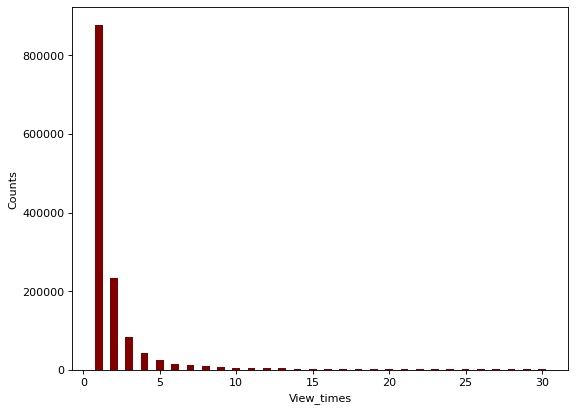

In [ ]:
b = Counter(view_time)
od = collections.OrderedDict(sorted(b.items()))
a = list(od.keys())
c =  list(od.values())

plt.figure(figsize=(8, 6), dpi=80)
plt.bar(a[:30], c[:30], color ='maroon',
        width = 0.5)
plt.xlabel('View_times')
plt.ylabel('Counts')

In [ ]:
#thống kê số lượt xem:
duration_time = []

for x in tqdm(rs_cf.member_id.unique()):
  sum_duration_history = check_duration_content(rs_cf, x)
  for y in sum_duration_history['duration']:
    duration_time.append(y)
  del(sum_duration_history)
  gc.collect



Median: 307


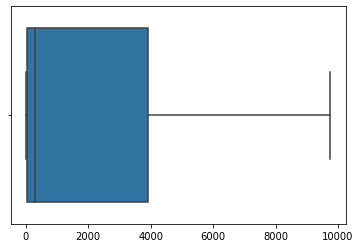

In [ ]:
sns.boxplot(x= duration_time,
                showfliers=False)
print('Median:', statistics.median(duration_time))

##### 3.4.2 Gán nhãn và thực hiện

In [ ]:

median = 307

W = []
b = []


for x in tqdm(train.member_id.unique()):
  y = []
  sum_duration_history = check_duration_content(rs_cf, x)
  sum_view_history = check_view_content(rs_cf, x)
  for i in range(len(sum_duration_history['duration'])):
     y.append(labels_like(median, sum_view_history, sum_duration_history))
  
  sum_duration_history['like'] = y #them cột yêu thích
  sum_duration_history = sum_duration_history.loc[sum_duration_history.content_id.isin(item_profile.content_id)]#lọc bỏ giá trị ko có trong item profile

  item_profile_viewed = item_profile.loc[item_profile.content_id.isin(sum_duration_history.content_id)].sort_values(by = 'content_id')#loc giá trị thuộc list duration

  #Đưa vào mô hình:
  X = np.array(item_profile_viewed.drop(['content_id'], axis = 1))
  y = np.array(sum_duration_history.like).reshape(-1,1)
  coef_ = model_Ridge(X,y)
  W.append(coef_)
  # b.append(intercept_)


  del(sum_duration_history,sum_view_history,X,y,coef_,item_profile_viewed)
  gc.collect()


In [ ]:
#lưu W và b của từng user vào một dataframe
user_model = pd.DataFrame(data = train.member_id.unique(), columns=['member_id'])
user_model['coef'] = [x.reshape(item_profile.shape[1]-1,) if len(x[0]) == item_profile.shape[1]-1 else x[0] for x in W ]
# user_model['intercept_'] = b
user_model


,member_id,coef
0,372926,"[0.0, 2.994826513793811, 0.0, 2.13980028530670..."
1,5165925,"[0.0, 0.0, 0.0, 1.994188789827902, 0.0, 0.0, 0..."
2,5828411,"[0.0, 0.0, 0.0, 2.492837210458589, 0.0, 0.0, 0..."
3,5354087,"[0.0, 0.0, 1.6638935108153086, 2.3839316283706..."
4,1189841,"[0.0, 0.0, 0.0, 0.0, 0.4975124378109454, 0.0, ..."
...,...,...
22701,12401307,"[0.0, 0.0, 0.9900990099009903, 0.0, 2.12234706..."
22702,3983823,"[0.0, 0.0, 0.9900990099009903, 2.5948103792415..."
22703,7906433,"[0.0, 0.0, 0.0, 0.0, 1.492537313432841, 0.0, 0..."
22704,2092873,"[0.0, 0.0, 0.0, 2.990033222591362, 2.487562189..."


In [ ]:
list_mem_test = test.member_id.unique()
y_pred = []
y_true = []

for x in tqdm(list_mem_test):
  x_model = user_model.loc[user_model['member_id'] == x].reset_index(drop = True)
  if len(x_model) == 1:
    if len(x_model.coef[0]) != 1: 
      y = []
      sum_duration_history = check_duration_content(rs_cf, x)
      sum_view_history = check_view_content(rs_cf, x)
      for i in range(len(sum_duration_history['duration'])):
        y.append(labels_like(median, sum_view_history, sum_duration_history))
      
      sum_duration_history['like'] = y #them cột yêu thích
      sum_duration_history = sum_duration_history.loc[sum_duration_history.content_id.isin(item_profile.content_id)]#lọc bỏ giá trị ko có trong item profile

      item_profile_viewed = item_profile.loc[item_profile.content_id.isin(sum_duration_history.content_id)].sort_values(by = 'content_id')#loc giá trị thuộc list duration

      #Đưa vào mô hình:
      X_test = np.array(item_profile_viewed.drop(['content_id'], axis = 1))
      
      for i in range(len(X_test)):
        # pred = X_test[i].dot(x_model.coef[0]) + x_model.intercept_[0]
        pred = X_test[i].dot(x_model.coef[0])
        y_pred.append(pred)
        y_true.append(y[i])

      del(sum_duration_history,sum_view_history,X_test,y,item_profile_viewed)

    
  del(x_model)
  gc.collect()

In [ ]:
y_pred_ = [round(x) for x in y_pred]
RMSE = math.sqrt(mean_squared_error(y_true, y_pred_))
RMSE

0.6935517191194807